In [104]:
import pandas as pd
import numpy as np

In [97]:
years = ['2017', '2018', '2019', '2020']

df = pd.DataFrame()

for y in years:
    data = pd.read_html('https://www.basketball-reference.com/leagues/NBA_' + y + '_per_game.html')
    df = df.append(data)
    if y == years[0]:
        df["season"] = y
    else:
        df['season'] = df['season'].fillna(y)


In [98]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season'],
      dtype='object')

In [99]:
df.Age.unique()

array(['23', '26', '31', '28', '27', '35', '38', '34', '22', '32', 'Age',
       '30', '29', '20', '24', '36', '19', '21', '25', '40', '33', '39',
       '37', '41', '42', '43'], dtype=object)

In [103]:

df = df[ df['Age'] != 'Age' ]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,1,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2017
1,2,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,...,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2017
2,2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,...,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2017
3,2,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,...,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5,2017
4,3,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
673,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
674,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
675,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [105]:
df.shape


(2618, 31)

In [106]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,1,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2017
1,2,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,...,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2017
2,2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,...,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2017
3,2,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,...,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5,2017
4,3,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2017


In [107]:
df.isna().sum()

Rk          0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        14
3P          0
3PA         0
3P%       193
2P          0
2PA         0
2P%        44
eFG%       14
FT          0
FTA         0
FT%       158
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
season      0
dtype: int64

In [108]:
df = df.fillna(0)

In [109]:
df.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
season    0
dtype: int64

In [110]:
df = df.drop(['Rk'], axis = 1)


In [111]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,.393,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2017
1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,.412,...,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2017
2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,.294,...,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2017
3,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,.425,...,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5,2017
4,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,.571,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
673,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
674,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
675,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [112]:
df.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
season    object
dtype: object

In [113]:
df.to_csv('nba2017-2019.csv', index=False)

In [114]:
df = pd.read_csv('nba2017-2019.csv')

In [115]:
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
season      int64
dtype: object

In [120]:
pd.set_option('display.max_columns', 50)

df[ df['PTS'] == df['PTS'].max() ]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
1526,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,4.8,13.2,0.368,6.0,11.3,0.528,0.541,9.7,11.0,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019


In [122]:
df.reset_index()

,index,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,0,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2017
1,1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,0.412,1.0,2.4,0.411,0.9,2.1,0.413,0.521,1.2,1.6,0.750,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2017
2,2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,0.294,0.2,1.2,0.143,0.7,1.7,0.400,0.324,0.3,0.5,0.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2017
3,3,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,0.425,1.1,2.6,0.434,0.9,2.2,0.414,0.542,1.3,1.8,0.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5,2017
4,4,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2613,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2020
2614,2614,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,2020
2615,2615,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,0.0,0.0,0.000,0.5,2.0,0.250,0.250,0.0,0.0,0.000,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2020
2616,2616,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,0.0,0.0,0.000,1.9,3.3,0.569,0.569,0.6,0.9,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,2020


In [123]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season'],
      dtype='object')

In [124]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,0.393,1.4,3.6,0.381,0.6,1.4,0.426,0.531,0.6,0.7,0.898,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,2017
1,Quincy Acy,PF,26,TOT,38,1,14.7,1.8,4.5,0.412,1.0,2.4,0.411,0.9,2.1,0.413,0.521,1.2,1.6,0.750,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,2017
2,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,0.294,0.2,1.2,0.143,0.7,1.7,0.400,0.324,0.3,0.5,0.667,0.3,1.0,1.3,0.0,0.0,0.0,0.3,1.5,2.2,2017
3,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,0.425,1.1,2.6,0.434,0.9,2.2,0.414,0.542,1.3,1.8,0.754,0.6,2.8,3.3,0.6,0.4,0.5,0.6,1.8,6.5,2017
4,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,0.571,0.0,0.0,0.000,4.7,8.2,0.572,0.571,2.0,3.2,0.611,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,2017


<AxesSubplot:xlabel='MP', ylabel='PTS'>

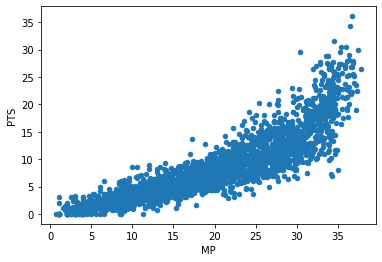

In [137]:
df.plot.scatter(x = 'MP' , y = 'PTS')

In [149]:
df[ (df['PTS'] >= 20)  & (df['AST'] >= 5) & (df['TRB'] >= 5)  ]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
19,Giannis Antetokounmpo,SF,22,MIL,80,80,35.6,8.2,15.7,0.521,0.6,2.3,0.272,7.6,13.5,0.563,0.541,5.9,7.7,0.770,1.8,7.0,8.8,5.4,1.6,1.9,2.9,3.1,22.9,2017
79,Jimmy Butler,SF,27,CHI,76,75,37.0,7.5,16.5,0.455,1.2,3.3,0.367,6.3,13.2,0.477,0.492,7.7,8.9,0.865,1.7,4.5,6.2,5.5,1.9,0.4,2.1,1.5,23.9,2017
210,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,9.6,0.530,0.525,9.2,10.9,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,2017
269,LeBron James,SF,32,CLE,74,74,37.8,9.9,18.2,0.548,1.7,4.6,0.363,8.3,13.5,0.611,0.594,4.8,7.2,0.674,1.3,7.3,8.6,8.7,1.2,0.6,4.1,1.8,26.4,2017
558,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,2017
729,DeMarcus Cousins,C,27,NOP,48,48,36.2,8.5,18.0,0.470,2.2,6.1,0.354,6.3,11.9,0.530,0.530,6.1,8.2,0.746,2.2,10.7,12.9,5.4,1.6,1.6,5.0,3.8,25.2,2018
741,Stephen Curry,PG,29,GSW,51,51,32.0,8.4,16.9,0.495,4.2,9.8,0.423,4.2,7.1,0.595,0.618,5.5,5.9,0.921,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4,2018
766,Kevin Durant,SF,29,GSW,68,68,34.2,9.3,18.0,0.516,2.5,6.1,0.419,6.7,11.9,0.565,0.586,5.3,5.9,0.889,0.5,6.4,6.8,5.4,0.7,1.8,3.0,2.0,26.4,2018
822,Blake Griffin,PF,28,TOT,58,58,34.0,7.5,17.2,0.438,1.9,5.6,0.345,5.6,11.6,0.482,0.493,4.5,5.7,0.785,1.3,6.1,7.4,5.8,0.7,0.3,2.8,2.4,21.4,2018
823,Blake Griffin,PF,28,LAC,33,33,34.5,7.7,17.5,0.441,1.9,5.7,0.342,5.8,11.8,0.488,0.497,5.2,6.6,0.785,1.4,6.5,7.9,5.4,0.9,0.3,3.0,2.4,22.6,2018
